In [1]:
import os
import scipy.io as scio
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
import math
from skyfield.api import EarthSatellite,load, wgs84
from skyfield.elementslib import osculating_elements_of
from pytz import timezone
from matplotlib.colors import cnames
from tqdm import tqdm
from multiprocessing import Pool
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator

UTC = timezone('UTC')


## No need to run

In [2]:
data_decay=np.load('../figure14/data/position_height_lat_long_41_719_decay_1409.npy',allow_pickle=True).item()
starttime=datetime.strptime("2022-4-1 0:0:0","%Y-%m-%d %H:%M:%S")
endtime=datetime.strptime("2022-7-20 0:0:0","%Y-%m-%d %H:%M:%S")

In [3]:
data_decay_temp = {}
data_decay_temp[45388] = data_decay[45388]
data_decay_temp[44952] = data_decay[44952]
data_decay_temp[46794] = data_decay[46794]
data_decay_temp[47820] = data_decay[47820]

In [4]:
np.save('./data/data_decay.npy',data_decay_temp)

## Start from this line

In [5]:
data_decay = np.load('./data/data_decay.npy',allow_pickle=True).item()

/root/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


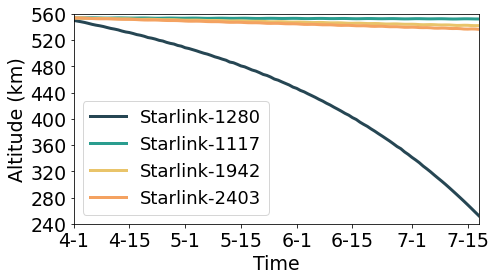

In [6]:

plt.figure(figsize=(7,4))
data=[data_decay[45388]['height'],data_decay[44952]['height'],data_decay[46794]['height'],data_decay[47820]['height']]

c=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51',"#3F72AF","#112D4E"]
i=0
label=['Starlink-1280','Starlink-1117','Starlink-1942','Starlink-2403']
# plt.ylim([526,548])

for item in data:
    mean_alt=[]
    l=0
    while l+24<=len(item):
        mean_alt.append(np.mean(item[l:l+24]))
        l+=24
    plt.plot([starttime+timedelta(days=i) for i in range(len(mean_alt))],mean_alt,label=label[i],c=c[i],lw=3)
    i+=1
plt.xlim(starttime,endtime-timedelta(days=1))
plt.legend(fontsize=18)
plt.xlabel('Time',fontsize=19)
plt.ylabel('Altitude (km)',fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.xticks([starttime,starttime+timedelta(days=15),starttime+timedelta(days=30),starttime+timedelta(days=45),starttime+timedelta(days=60),starttime+timedelta(days=75),starttime+timedelta(days=91),starttime+timedelta(days=106)],['4-1','4-15','5-1','5-15','6-1','6-15','7-1','7-15'])
plt.yticks(range(240,561,40),range(240,561,40))
plt.ylim(240,560)
plt.tight_layout()
#plt.savefig('decay-pattern-v2.pdf')